In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter

Lambd = 1
N = 25

def statistics(x):
    print(f"Выборка: {x} \nМода(ы): {moda(x)} \nМединана: {median(x)} \nРазмах: {razm(x)} \nКоэфф. ассиметрии: {assim(x)} \n")

def mean(x):
    return sum(x) / len(x);

def moda(x):
    c = Counter(x) 
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]] 

def median(x):
    n = len(x) 
    cind = n // 2 
    if n % 2: 
        return sorted(x)[cind] 
    return sum(sorted(x)[cind - 1:cind + 1]) / 2

def razm(x):
    return max(x) - min(x)

def assim(x):
    m2 = mean((x - mean(x))**2)
    m3 = mean((x - mean(x))**3)
    return round(m3/(m2**(3/2)),4)

def imperF(x):
    xs = []
    ys = []
    sor = sorted(x)
    for i in range(len(x)):
        xs.append(sor[i])
        ys.append(i/len(x))
    
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.minorticks_on()
    ax.grid(which='major', color = 'k', linewidth = 1)
    ax.grid(which='minor', color = 'k', linestyle = ':')
    ax.set_xlabel('x')
    ax.set_ylabel('F(x)')
    ax.step(xs, ys)
    
def gist(x):
    k = 1 + int(np.log2(len(x)))
    
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.minorticks_on()
    ax.grid(which='major', color = 'k', linewidth = 1)
    ax.grid(which='minor', color = 'k', linestyle = ':')
    ax.set_xlabel('x')
    ax.set_ylabel('\u03C1(x)')
    ax.hist(x, bins = 2*k,density=True)
    
def box(x):
    fig, ax = plt.subplots(figsize=(9, 4.5))
    ax.minorticks_on()
    ax.grid(which='major', color = 'k', linestyle = ':')
    ax.grid(which='minor', color = 'k', linestyle = ':')
    ax.set_xlabel('x')
    ax.boxplot(x,vert=False,meanline=True)
    
def kerEpan(x):
    r = 0.75*(1-x**2)
    return((r>0)*r)

def kern(x):
    xs = np.linspace(0,max(x),100)
    s2 = sum((x-mean(x))**2)/(len(x)-1)
    h = 2.344*(s2**0.5)/(len(x)**0.2)
    ys = np.array([(sum(kerEpan((z-x)/h))/(len(x)*h)) for z in xs])
    
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.minorticks_on()
    ax.grid(which='major', color = 'k', linewidth = 1)
    ax.grid(which='minor', color = 'k', linestyle = ':')
    ax.set_xlabel('x')
    ax.set_ylabel('p(x)')
    ax.plot(xs, ys)
    
def bootstrap_mean(x):
    s = []
    for i in range(1000):
        s.append(mean([x[random.randint(0,N-1)] for i in range(N)]))
    gist(s)
    
def bootstrap_assim(x):
    s = []
    for i in range(1000):
        s.append(assim([x[random.randint(0,N-1)] for i in range(N)]))
    gist(s)

In [3]:
x = np.array([round(random.expovariate(Lambd),2) for i in range(N)])

In [4]:
statistics(x)

Выборка: [0.01 4.29 0.35 0.69 1.25 0.47 0.01 2.9  2.81 1.52 3.21 1.89 1.98 0.15
 0.02 0.02 0.49 0.1  2.07 0.67 0.46 0.38 0.08 0.05 2.61] 
Мода(ы): [0.01, 0.02] 
Мединана: 0.49 
Размах: 4.28 
Коэфф. ассиметрии: 0.9595 



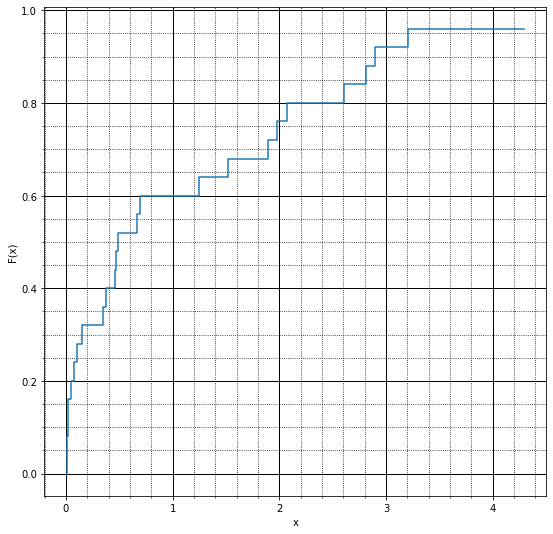

In [19]:
imperF(x)

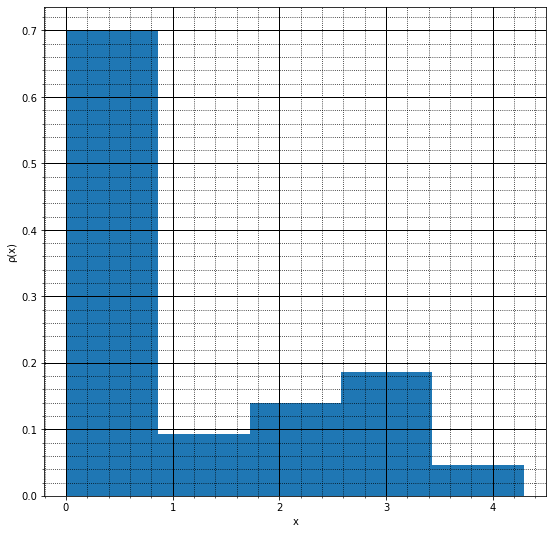

In [20]:
gist(x)

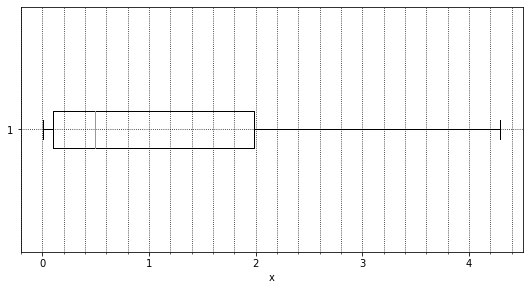

In [21]:
box(x)

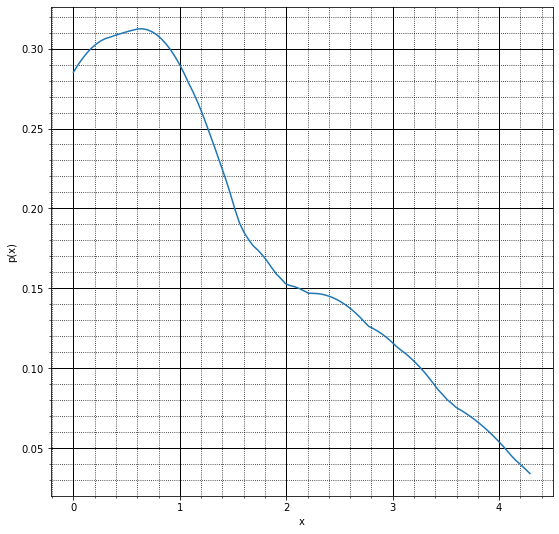

In [22]:
kern(x)

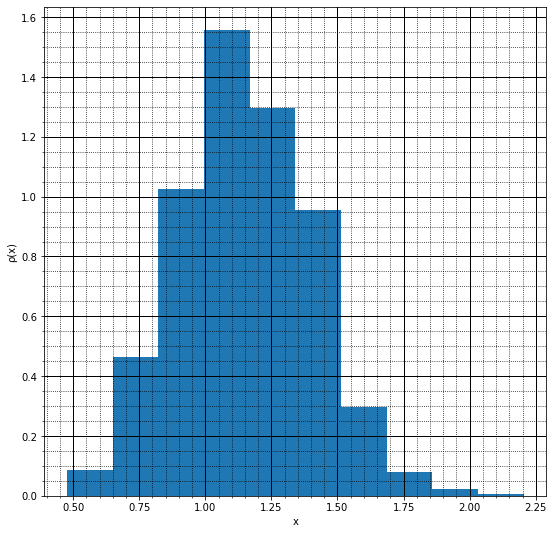

In [23]:
bootstrap_mean(x)

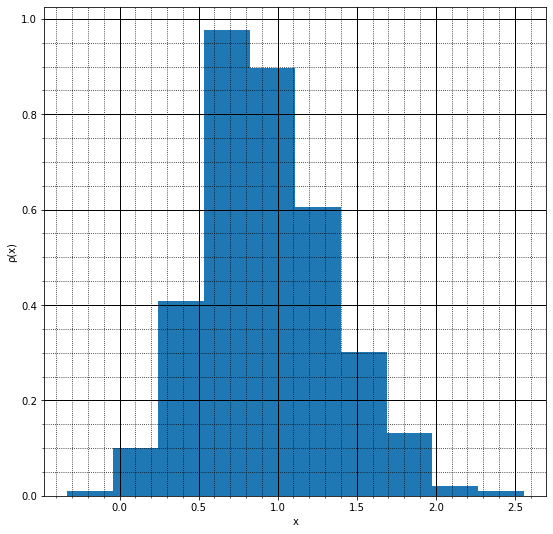

In [24]:
bootstrap_assim(x)